In [435]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import torch as th
import torch.nn as nn
import torch.optim as optim


# Obtain

In [436]:
#Use cuda if available
device = th.device("cuda" if th.cuda.is_available() else "cpu")

In [437]:
df = pd.read_csv('./data/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Scrub

In [438]:
# Keep the  mouth in Date
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df= df.drop(columns=['Date'])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,6
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,6
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,6
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,6


In [439]:
for col in df.columns:
    print(df[col].dtype)
    

object
float64
float64
float64
float64
float64
object
float64
object
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
object
int64


### Se eliminan los NA para no introducir incertidumbre 

In [440]:
#Mapping target variable
mapper = { 'Yes': 1, 'No': 0}
df['RainToday'] = df['RainToday'].map(mapper)
df['RainTomorrow'] = df['RainTomorrow'].map(mapper)
df_na = df.loc[df['RainTomorrow'].isna()]
df = df.loc[df['RainTomorrow'].notna()]

df_na

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
14,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,...,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,0.0,NaN,12
283,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,...,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,0.0,NaN,9
435,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,0.0,NaN,2
437,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,...,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,0.0,NaN,2
443,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,...,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,0.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,ESE,...,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,0.0,NaN,2
145091,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,0.0,NaN,6
145092,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,NaN,...,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN,6
145335,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,0.0,NaN,2


In [441]:
# Label encoding
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label.fit_transform(df[col])
df
                                

C:\Users\juanj\AppData\Local\Temp\ipykernel_18100\3918831188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label.fit_transform(df[col])
C:\Users\juanj\AppData\Local\Temp\ipykernel_18100\3918831188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label.fit_transform(df[col])
C:\Users\juanj\AppData\Local\Temp\ipykernel_18100\3918831188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,12
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,12
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,12
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,12
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,NaN,NaN,0,31.0,2,0,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0.0,6
145455,41,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0,6
145456,41,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0,6
145457,41,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0,6


In [442]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
count,142193.000000,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,142193.000000,132923.000000,142193.000000,142193.000000,...,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787.000000,142193.000000,142193.000000
mean,23.740655,12.186400,23.226784,2.349974,5.469824,7.624853,8.255885,39.984292,7.915755,7.974471,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.223423,0.224181,6.402544
std,14.237503,6.403283,7.117618,8.465173,4.188537,3.781525,4.953096,13.588801,4.911307,4.731493,...,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.416541,0.417043,3.426506
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,1.000000
25%,11.000000,7.600000,17.900000,0.000000,2.600000,4.900000,4.000000,31.000000,3.000000,4.000000,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,0.000000,3.000000
50%,24.000000,12.000000,22.600000,0.000000,4.800000,8.500000,9.000000,39.000000,8.000000,8.000000,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000,6.000000
75%,36.000000,16.800000,28.200000,0.800000,7.400000,10.600000,13.000000,48.000000,12.000000,12.000000,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000,0.000000,9.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,16.000000,135.000000,16.000000,16.000000,...,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,12.000000


In [443]:
# Fill missing values with the mode
df = df.fillna(df.mean())


#### Se presenta outliers en la feature "Evaporacion"

<Axes: xlabel='Evaporation', ylabel='count'>

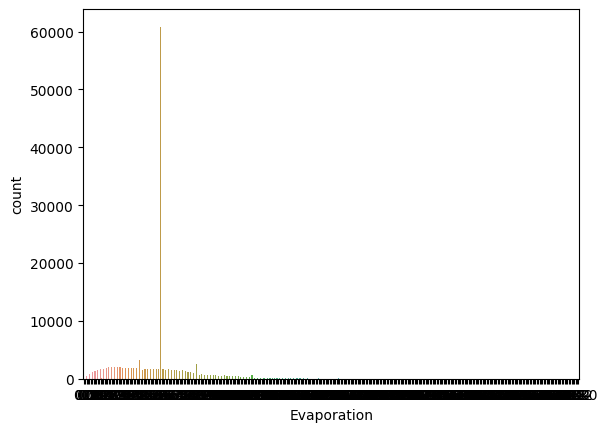

In [444]:
# Using seaborn to plot the instances of Evaporation
sns.countplot(x='Evaporation', data=df)


[(0.0, 10000.0)]

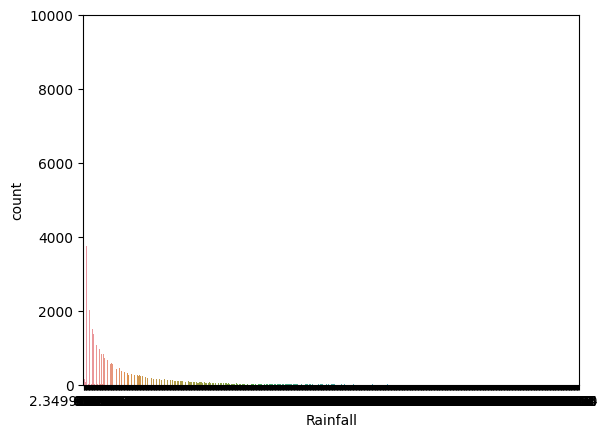

In [445]:
# Plot instances of rainfall
plot = sns.countplot(x='Rainfall', data=df )
plot.set(ylim=(0, 10000))

<Axes: xlabel='WindGustSpeed', ylabel='count'>

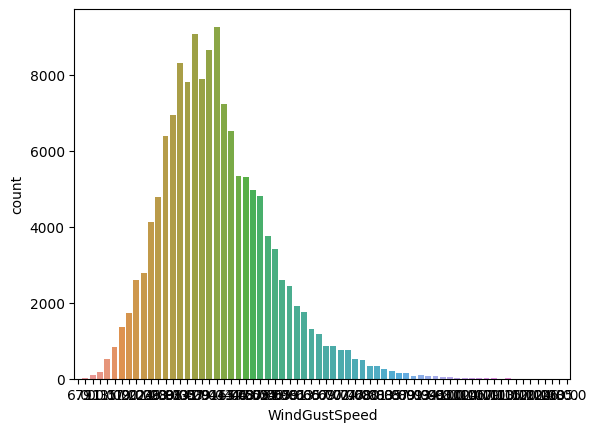

In [446]:
sns.countplot(x='WindGustSpeed', data=df)

<Axes: xlabel='Humidity3pm', ylabel='count'>

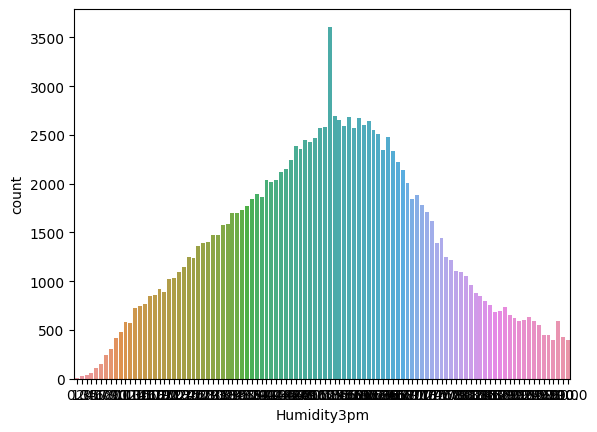

In [447]:
sns.countplot(x='Humidity3pm', data=df)

In [448]:
Q1 = df['Evaporation'].quantile(0.25)
Q3 = df['Evaporation'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[((df['Evaporation'] < (Q1 - 1.5 * IQR)) | (df['Evaporation'] > (Q3 + 1.5 * IQR)))]

In [449]:
#Drop outliers
df = df[~((df['Evaporation'] < (Q1 - 1.5 * IQR)) | (df['Evaporation'] > (Q3 + 1.5 * IQR)))]

<Axes: xlabel='Evaporation', ylabel='count'>

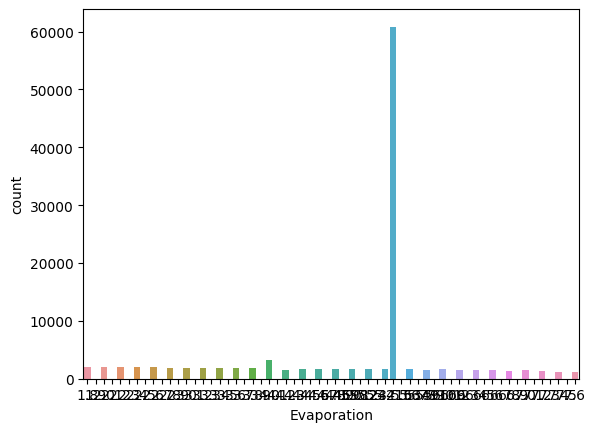

In [450]:
sns.countplot(x='Evaporation', data=df)

<Axes: >

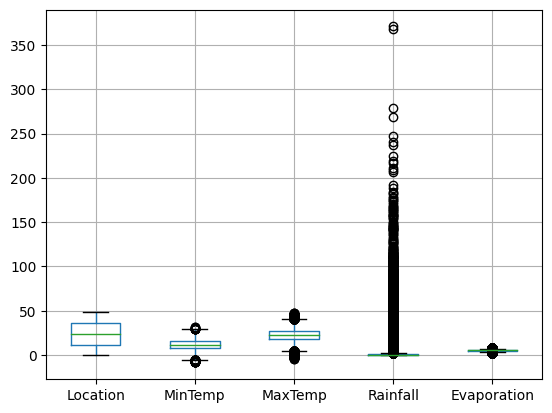

In [451]:
#Boxplot of 10 first columns
df.iloc[:, 0:5].boxplot()

### Drop Rainfall 

In [452]:
#Drop Rainfall column
df = df.drop(columns=['Rainfall'])
df

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2,13.4,22.9,5.469824,7.624853,13,44.0,13,14,20.0,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0.0,12
1,2,7.4,25.1,5.469824,7.624853,14,44.0,6,15,4.0,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0.0,12
2,2,12.9,25.7,5.469824,7.624853,15,46.0,13,15,19.0,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,0.0,12
3,2,9.2,28.0,5.469824,7.624853,4,24.0,9,0,11.0,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,0.0,12
4,2,17.5,32.3,5.469824,7.624853,13,41.0,1,7,7.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,5.469824,7.624853,0,31.0,2,0,15.0,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0.0,0.0,6
145455,41,2.8,23.4,5.469824,7.624853,0,31.0,9,1,13.0,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0.0,0.0,6
145456,41,3.6,25.3,5.469824,7.624853,6,22.0,9,3,13.0,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0.0,0.0,6
145457,41,5.4,26.9,5.469824,7.624853,3,37.0,9,14,9.0,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0.0,0.0,6


### Split

In [453]:
#Split the dataset in train, test

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
130327,15,8.8,18.2,2.400000,9.600000,9,33.0,3,9,7.0,...,63.0,1020.200000,1016.200000,7.000000,5.000000,14.7,16.7,0.0,1.0,11
63255,35,13.9,19.2,5.469824,7.624853,0,41.0,9,9,13.0,...,89.0,1014.500000,1013.900000,8.000000,8.000000,17.8,17.9,0.0,0.0,12
135495,17,8.0,22.6,5.469824,7.624853,6,39.0,6,7,7.0,...,46.0,1017.653758,1015.258204,4.437189,4.503167,14.8,21.3,0.0,0.0,11
134316,17,1.3,12.5,5.469824,7.624853,7,26.0,16,6,0.0,...,67.0,1029.600000,1026.300000,4.437189,4.503167,2.5,11.9,0.0,0.0,7
96241,39,22.2,30.5,7.400000,7.624853,2,43.0,10,1,17.0,...,60.0,1017.300000,1013.000000,4.437189,4.503167,27.1,29.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96849,0,14.0,22.7,5.469824,8.000000,12,35.0,12,15,13.0,...,43.0,1023.700000,1021.900000,4.437189,4.503167,16.8,21.8,0.0,0.0,12
141867,13,25.5,33.6,6.400000,5.900000,9,28.0,4,7,4.0,...,58.0,1013.300000,1009.800000,7.000000,6.000000,27.1,32.3,0.0,0.0,4
132999,15,9.5,16.3,1.800000,0.900000,7,46.0,7,3,35.0,...,60.0,1012.700000,1008.400000,7.000000,7.000000,11.7,15.9,0.0,0.0,5
869,2,2.7,16.0,5.469824,7.624853,8,13.0,16,10,0.0,...,55.0,1031.500000,1028.800000,4.437189,4.503167,6.6,15.9,0.0,0.0,5


# Training

In [454]:
#ANN
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(22, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
    
